## Análise Diagnóstica

### Identificando Causas de Baixa Conversão

Uma empresa notou que a taxa de conversão do site caiu nos últimos meses. Você recebeu um conjunto de dados com informações sobre acessos ao site, taxa de conversão, origem dos acessos e a presença de campanhas promocionais.

**Objetivo:**

* Descobrir se as campanhas promocionais influenciam na conversão.
* Analisar a relação entre origem dos acessos e taxa de conversão.
* Escrever as conclusões.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

Passo 1: Importando o arquivo CSV

In [64]:
df = pd.read_csv('conversao_site.csv')

Passo 2: Adicionando uma nova coluna para a taxa de conversão (%)

In [65]:
df['Taxa_Conversao'] = (df['Conversoes'] / df['Acessos']) * 100
df

,Mes,Acessos,Conversoes,Origem,Promocao,Taxa_Conversao
0,Janeiro,5000,250,Orgânico,1,5.000000
1,Fevereiro,4500,200,Pago,0,4.444444
2,Março,4000,150,Orgânico,1,3.750000
3,Abril,4800,240,Direto,0,5.000000
4,Maio,5300,260,Orgânico,1,4.905660
5,Junho,4700,230,Pago,1,4.893617
6,Julho,4900,240,Direto,0,4.897959
7,Agosto,4600,220,Pago,1,4.782609


Passo 3: Analisando a influência das campanhas promocionais

In [66]:
taxa_promocao = df[df['Promocao'] == 1]['Taxa_Conversao'].mean()
taxa_sem_promocao = df[df['Promocao'] == 0]['Taxa_Conversao'].mean()
print(f'Taxa média de conversão com promoção: {taxa_promocao:.2f}%')
print(f'Taxa média de conversão sem promoção: {taxa_sem_promocao:.2f}%')

Taxa média de conversão com promoção: 4.67%
Taxa média de conversão sem promoção: 4.78%


Passo 4: Analisando a relação entre origem dos acessos e taxa de conversão

In [67]:
taxa_por_origem = df.groupby('Origem')['Taxa_Conversao'].mean()
print('\nTaxa média de conversão por origem dos acessos:')

taxa_por_origem


Taxa média de conversão por origem dos acessos:


Origem
Direto      4.948980
Orgânico    4.551887
Pago        4.706890
Name: Taxa_Conversao, dtype: float64

Passo 5: Gráfico das taxas de conversão por origem

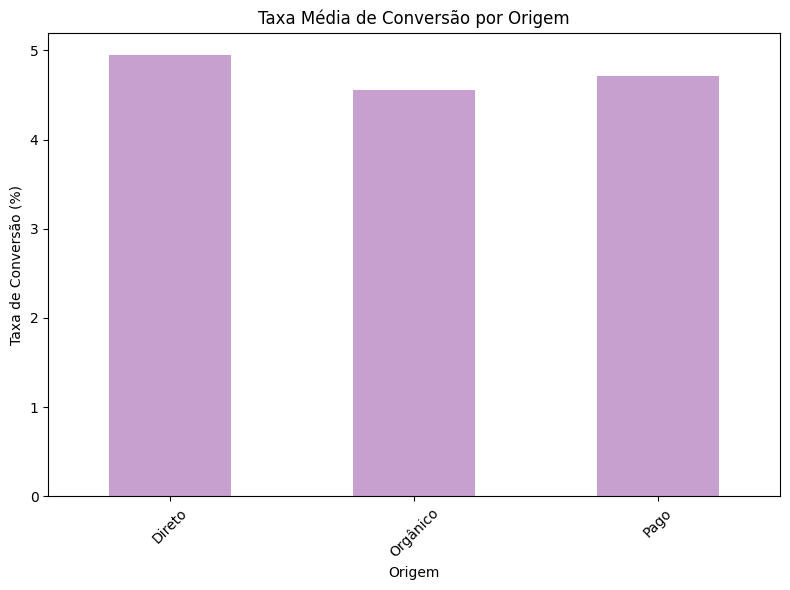

In [68]:
taxa_por_origem.plot(kind='bar', color='#C8A0CF', figsize=(8,6))
plt.title('Taxa Média de Conversão por Origem')
plt.xlabel('Origem')
plt.ylabel('Taxa de Conversão (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Passo 6: Conclusões

**Conclusões:**

In [69]:
print(f'- Com promoções, a taxa média de conversão foi de {taxa_promocao:.2f}%.')
print(f'- Sem promoções, a taxa média de conversão foi de {taxa_sem_promocao:.2f}%.')
print('- Promoções parecem melhorar a taxa de conversão.')
print('\nTaxa média de conversão por origem dos acessos:')
for origem, taxa in taxa_por_origem.items():
    print(f' * {origem}: {taxa:.2f}%')
print('- A origem "Direto" tem uma taxa de conversão maior comparada às demais, o que pode indicar que visitantes diretos têm maior intenção de compra.')

- Com promoções, a taxa média de conversão foi de 4.67%.
- Sem promoções, a taxa média de conversão foi de 4.78%.
- Promoções parecem melhorar a taxa de conversão.

Taxa média de conversão por origem dos acessos:
 * Direto: 4.95%
 * Orgânico: 4.55%
 * Pago: 4.71%
- A origem "Direto" tem uma taxa de conversão maior comparada às demais, o que pode indicar que visitantes diretos têm maior intenção de compra.
